# Project 2 - 

Team Members:
    * Phyllis Summers
    * Aparna Srikanti
    * Helen Wu
    
    
Purpose:

    Using a Kaggle Dataset (https://www.kaggle.com/jrosenblum123/visualizations-and-predicting-student-test-scores) on 
    Student Performance perform:
    
    * Data Exploration
    * Data Visualization leveraging R
    * Identify regression between different points of data
    * Identify if dependencies/correlation exist between different points of data
    
    The Kaggle Dataset contains marks secured by the students in high school.  Students are from the United States.  
    
    The dataset contains 1000 sample records, and contains columns identifying gender, ethnicity group, parental 
    education level, type of lunch program (free/reduced or standard) - an indicator of income, test prep completed 
    or no test prep, math score, reading score, and writing score.

Hypothesis:

    There is a correlation between math, reading, and writing scores and parental education level, gender, test prep, and 
    type of lunch program as a reference of income level.
    
Summary:

    The data used represents a normal distribution, so we feel it's a fair representation of data for use within our 
    analysis.
    
    The linear regression results of 86% adjusted r squared indicates a good prediction model can be put in place for math
    score.
    
    Results also show the following:
    
    * There is interesting data associated with impact of gender on scores, however, the ethnicity was shown as groups 
      without specificity, so it's difficult to truly get to any good results.  Additional data with specific 
      groups (instead of generic groups) would be required.
    * Income level of household would likely have provided more interesting results rather than using free/reduced or 
      standard lunch as replacement.
    * Additional data such as special needs programs like ESL or dyslexia, etc would have provided some interesting 
      additional data points to assess.


In [229]:
# Load Dependencies
library(tidyverse)
library(ggplot2)
library(plyr)
library(randomForest)
library(caTools)
library(miscTools)
library(rmarkdown)
library(pastecs)
library(psych)
library(Rmisc)
library(vioplot)
library(scatterplot3d)
library(MASS)
library(dplyr)
library(relaimpo)
library(ggthemes)
library(RColorBrewer)
library(ggrepel)


In [230]:
# Read in dataset
students <-read_csv("StudentsPerformance.csv")

Parsed with column specification:
cols(
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)


In [231]:
# After reviewing data and column names, rename columns for easier use in coding
colnames(students)[colnames(students)=="race/ethnicity"] <- "ethnicity"
colnames(students)[colnames(students)=="parental level of education"] <- "parent_education"
colnames(students)[colnames(students)=="test preparation course"] <- "test_prep_status"
colnames(students)[colnames(students)=="math score"] <- "math"
colnames(students)[colnames(students)=="reading score"] <- "reading"
colnames(students)[colnames(students)=="writing score"] <- "writing"
head(students)

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


In [232]:
# Lunch status is a qualitative data representation.  Added a lunch_code to provide 
# quantitative data for same data to allow use of the data within analysis that requires quantitative values.

students <- students %>% 
       mutate(lunch_code = case_when(lunch == "standard" ~ 1, 
                                     lunch == "free/reduced" ~ 2,
                                     TRUE ~ 0))
              
head(students)

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code
female,group B,bachelor's degree,standard,none,72,72,74,1
female,group C,some college,standard,completed,69,90,88,1
female,group B,master's degree,standard,none,90,95,93,1
male,group A,associate's degree,free/reduced,none,47,57,44,2
male,group C,some college,standard,none,76,78,75,1
female,group B,associate's degree,standard,none,71,83,78,1


# Summary Statistics

    Different summary statistics were run on the data to obtain Cooefficients, standard deviation, aggregate statistics,
    variance, etc.
    
    Functions used include:
    
    * summary - produce result summaries of the results of various model fitting functions
    NOTE:  We noticed a difference in R Studio output from Jupyter Notebook output

    * describe - Concise Statistical Description Of A Vector, Matrix, Data Frame, Or Formula
    
    R Studio Summary output:
    
    
    

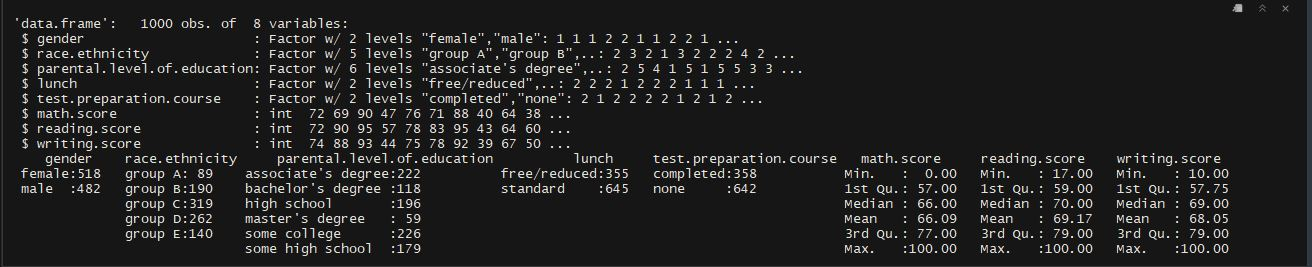

In [233]:
# mean,median,25th and 75th quartiles,min,max
summary(students)

    gender           ethnicity         parent_education      lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 test_prep_status        math           reading          writing      
 Length:1000        Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
 Mode  :character   Median : 66.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
                    3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
                    Max.   :100.00 

In [234]:
describe(students)
# item name ,item number, nvalid, mean, sd, 
# median, mad, min, max, skew, kurtosis, se

Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
gender*,1,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
ethnicity*,2,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
parent_education*,3,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
lunch*,4,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
test_prep_status*,5,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
math,6,1000,66.089,15.1630801,66,66.37750,14.8260,0,100,100,-0.2780989,0.26106523,0.47949869
reading,7,1000,69.169,14.6001919,70,69.50125,14.8260,17,100,83,-0.2583277,-0.07976785,0.46169861
writing,8,1000,68.054,15.1956570,69,68.40750,16.3086,10,100,90,-0.2885762,-0.04511069,0.48052887
lunch_code,9,1000,1.355,0.4787528,1,1.31875,0.0000,1,2,1,0.6051349,-1.63544421,0.01513949


# Histogram - Composite Score

    Initial analysis to determine if we had a fair, representative sample.  A histogram was selected to visualize this.
    
    Plot created to reflect the histogram of the composite score of students across math, reading and writing.  This shows 
    that the sample data follows a normal distribution

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code,composite.score,avg_score
female,group B,bachelor's degree,standard,none,72,72,74,1,218,72.66667
female,group C,some college,standard,completed,69,90,88,1,247,82.33333
female,group B,master's degree,standard,none,90,95,93,1,278,92.66667
male,group A,associate's degree,free/reduced,none,47,57,44,2,148,49.33333
male,group C,some college,standard,none,76,78,75,1,229,76.33333
female,group B,associate's degree,standard,none,71,83,78,1,232,77.33333


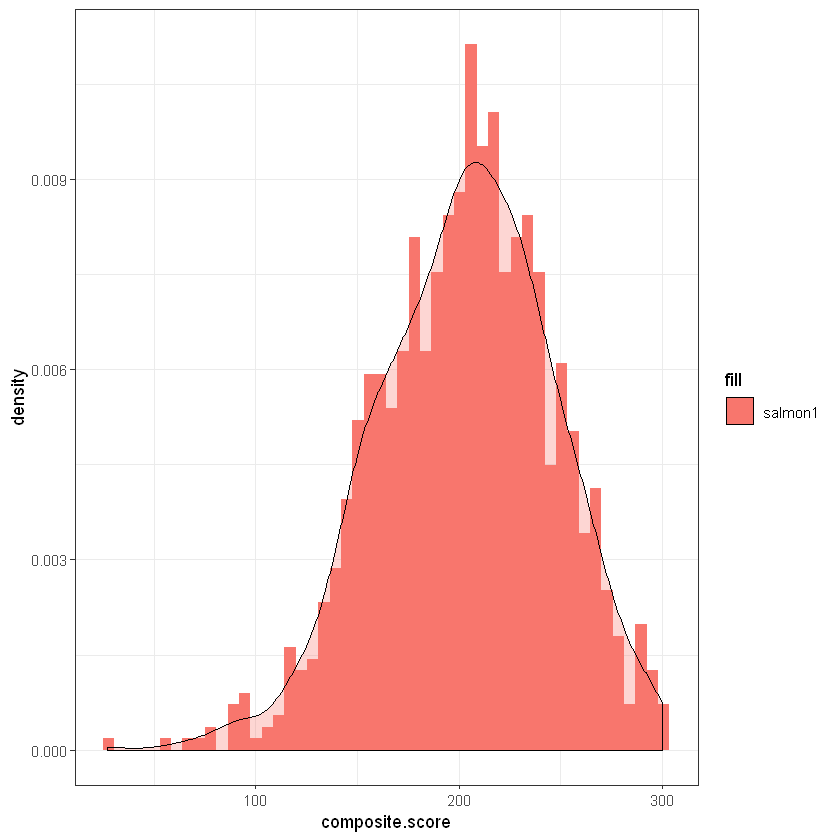

In [235]:
students <- students %>% mutate(composite.score = math + reading + writing)
students <- students %>% mutate(avg_score = composite.score / 3)
head(students)
ggplot(students, aes(x = composite.score, fill = 'salmon1')) + 
    geom_histogram(bins = 50, aes(y = ..density..)) + geom_density(alpha = 0.3) + theme_bw()

# Parent Education data analysis against other points

Analyzed Parent Education levels to other relevant data points


                  Df Sum Sq Mean Sq F value   Pr(>F)    
parent_education   5   7296  1459.1   6.522 5.59e-06 ***
Residuals        994 222394   223.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  Df Sum Sq Mean Sq F value   Pr(>F)    
parent_education   5  15623  3124.6   14.44 1.12e-13 ***
Residuals        994 215054   216.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

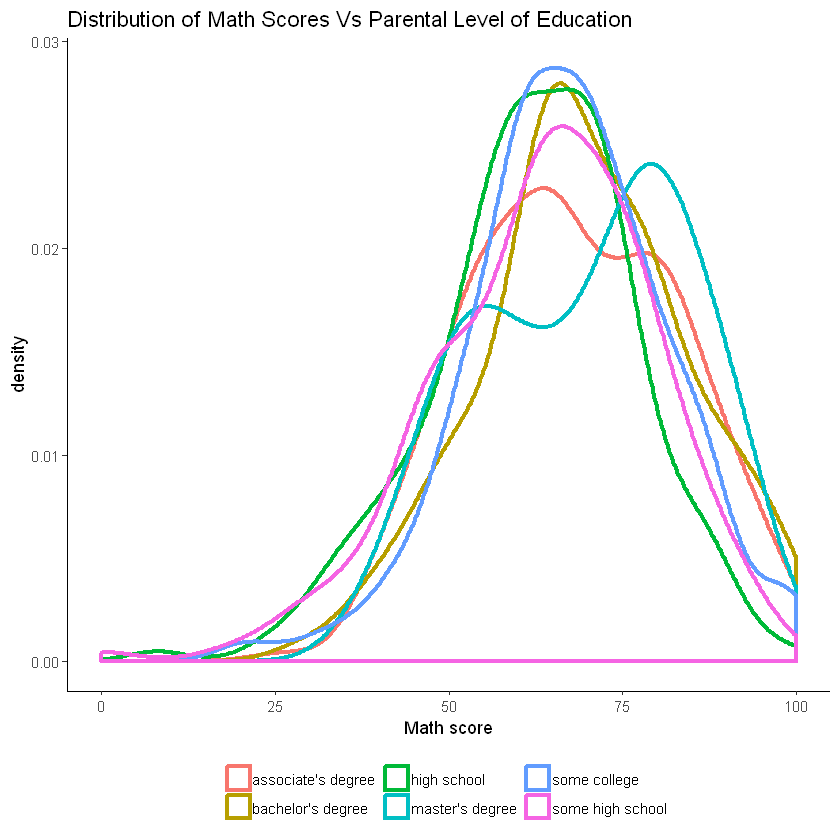

                  Df Sum Sq Mean Sq F value   Pr(>F)    
parent_education   5   9506  1901.3   9.289 1.17e-08 ***
Residuals        994 203446   204.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

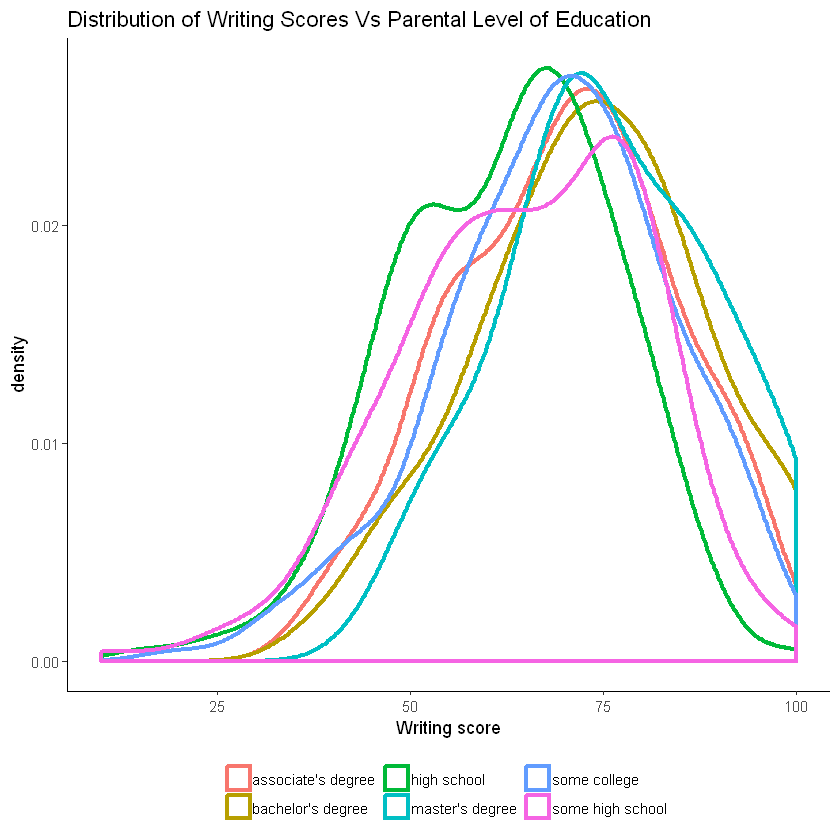

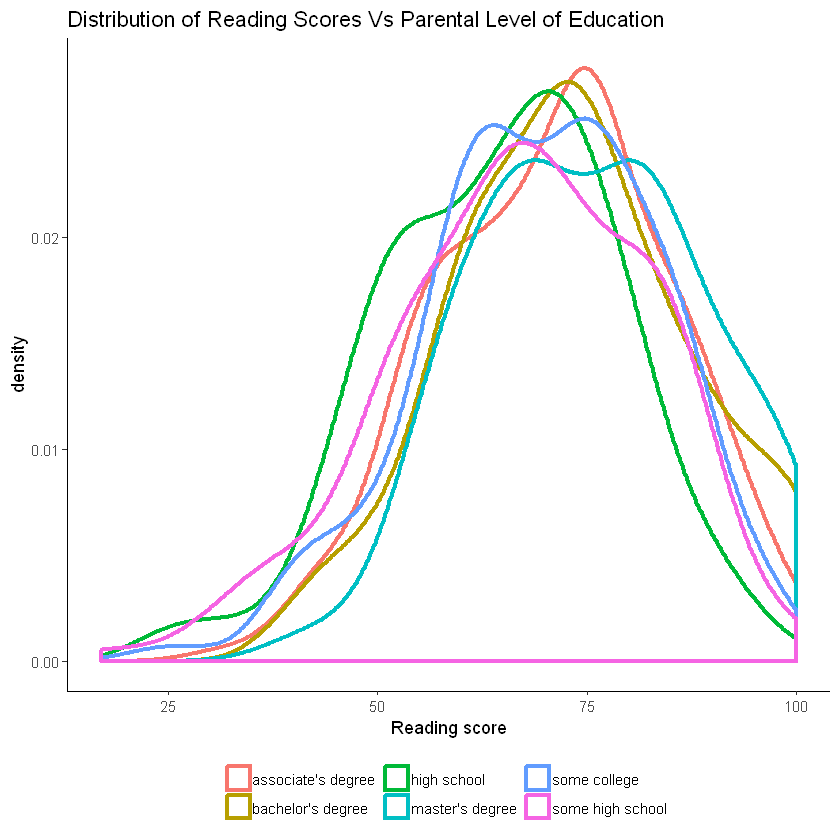

In [236]:
# plotting distribution of Math, Writing and Reading scores to parent level of Education

aov(math~parent_education,data=students) %>% summary()
ggplot(students,aes(math,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Math score",title="Distribution of Math Scores Vs Parental Level of Education")

aov(writing~parent_education,data=students) %>% summary()
ggplot(students,aes(writing,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Writing score",title="Distribution of Writing Scores Vs Parental Level of Education")

aov(reading~parent_education,data=students) %>% summary()
ggplot(students,aes(reading,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Reading score",title="Distribution of Reading Scores Vs Parental Level of Education")

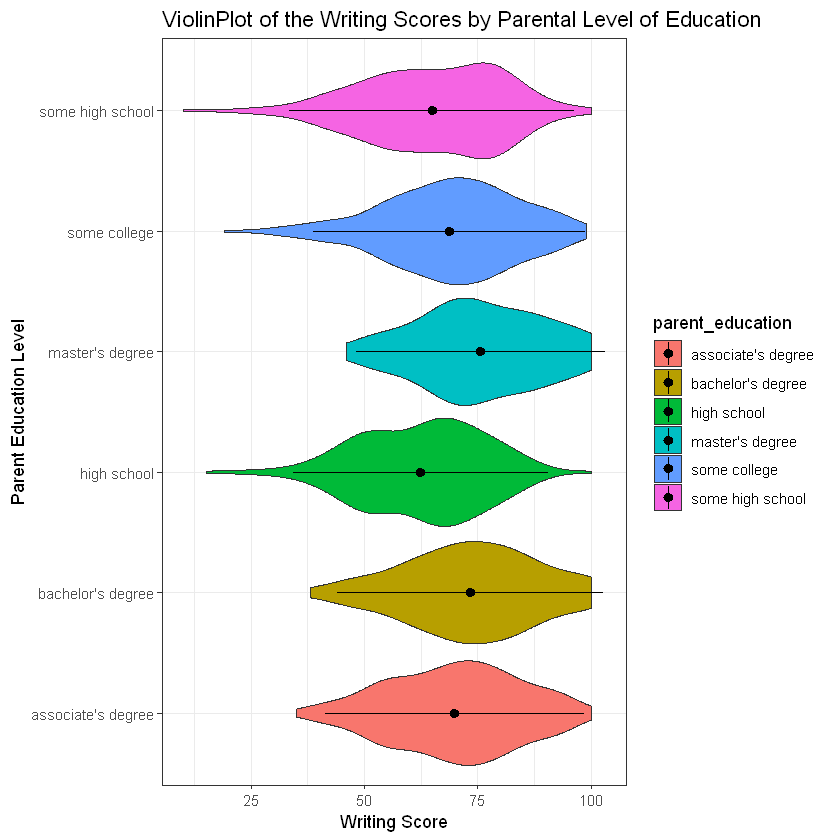

Warning message:
"Ignoring unknown parameters: width"

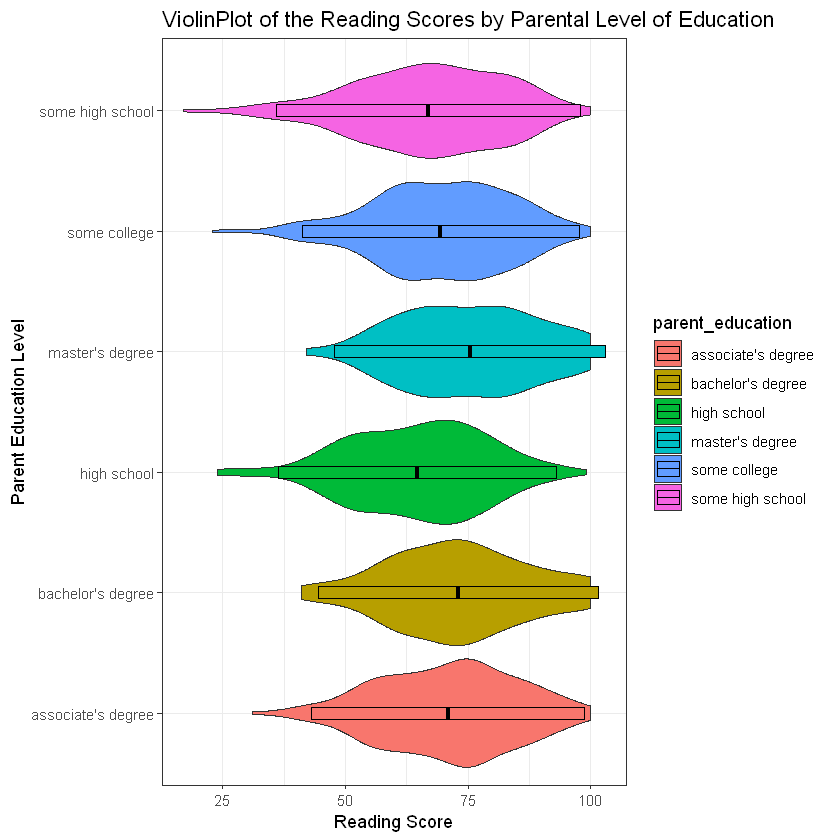

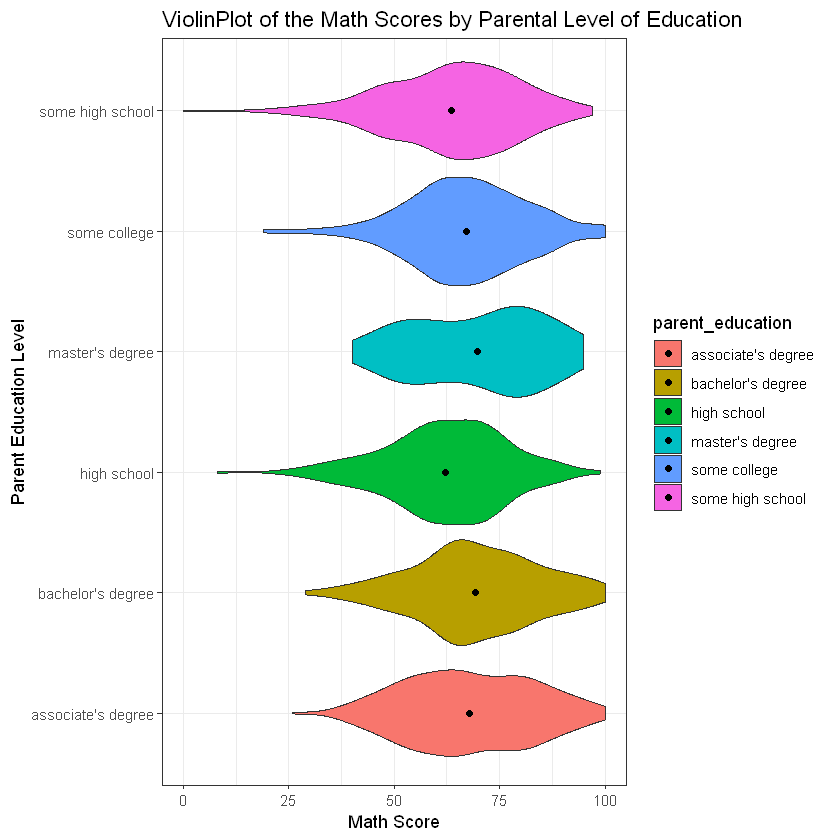

In [279]:
# Creating violin plots plotting scores to Parental Level of Education

students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = writing, fill = parent_education, xlab = "writing", ylab = "parent_education",
  main = "Writing vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+ 
   stat_summary(fun.data="mean_sdl", geom="pointrange") +
   xlab("Parent Education Level") +
 ylab("Writing Score") +
 ggtitle('ViolinPlot of the Writing Scores by Parental Level of Education')

students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = reading, fill = parent_education, xlab = "reading", ylab = "parent_education",
  main = "Reading vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+
   stat_summary(fun.data="mean_sdl", geom="crossbar", width=0.1) +
   xlab("Parent Education Level") +
 ylab("Reading Score") +
 ggtitle('ViolinPlot of the Reading Scores by Parental Level of Education')

students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = math, fill = parent_education, xlab = "math", ylab = "parent_education",
  main = "Math vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+
   stat_summary(fun.data="mean_sdl", geom="point", width=0.1) +
   xlab("Parent Education Level") +
 ylab("Math Score") +
 ggtitle('ViolinPlot of the Math Scores by Parental Level of Education')

# Does the gender of a student and Parent Education effect scores?

    The median of male students whose parents have master's degree is higher than in other degree levels.
    Female students whose parents have a high school degree seem to have the lowest median score.
    

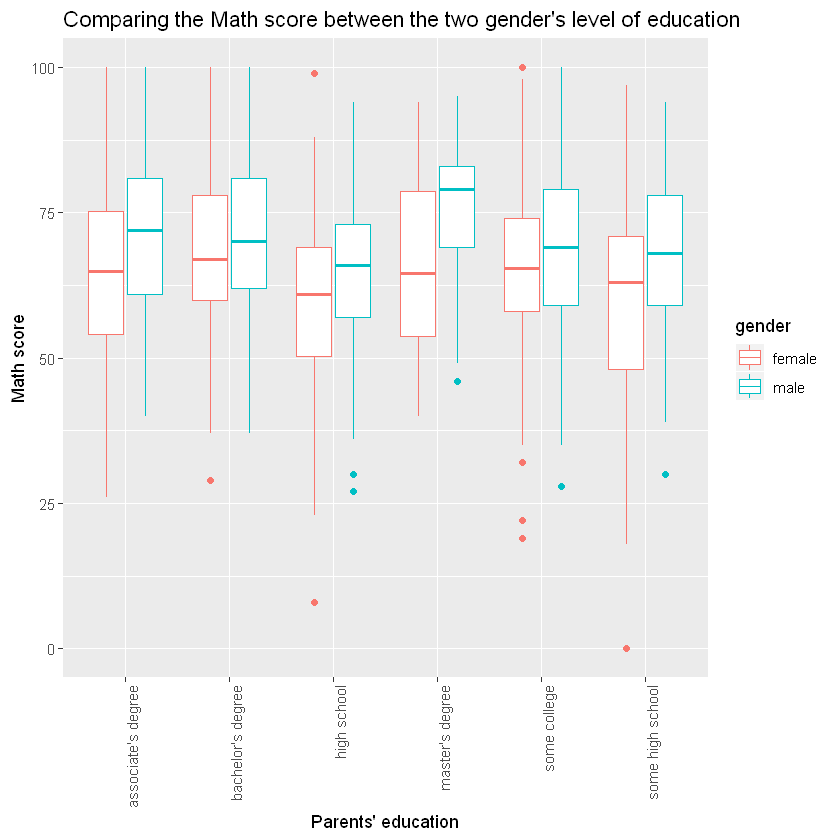

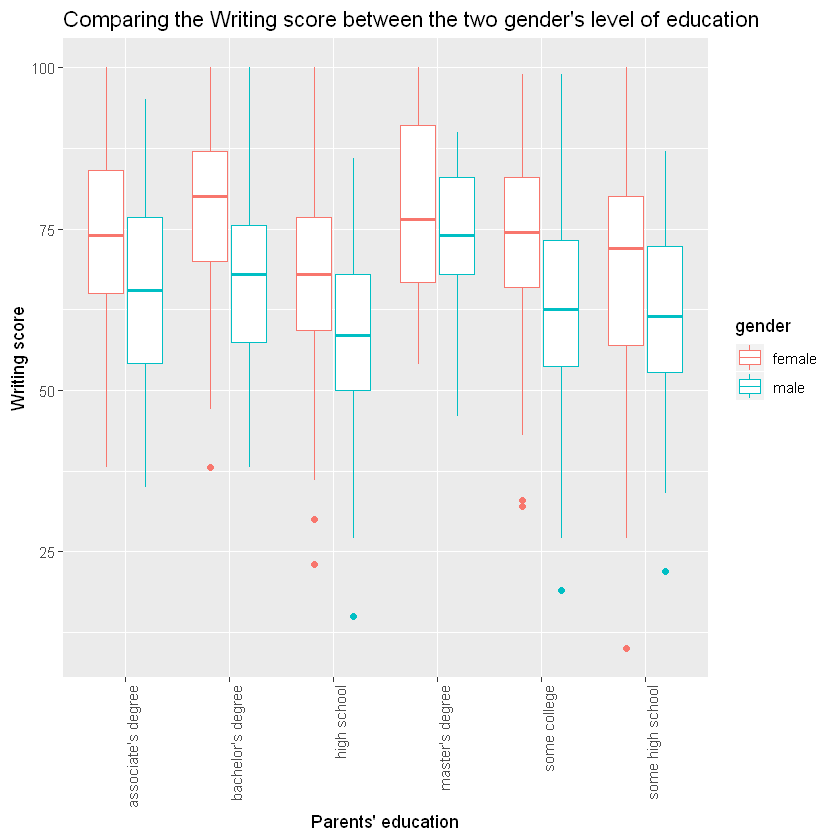

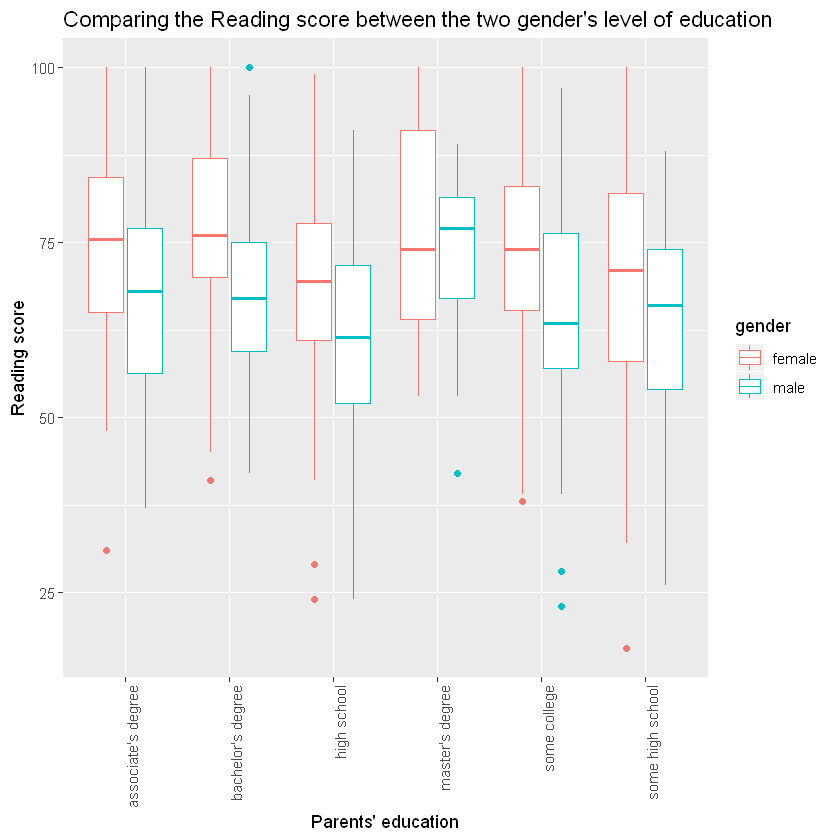

In [238]:
# Plotting Math, Writing and Reading to gender and Parent Education levels

ggplot(students, aes(x=parent_education, y=math, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Math score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Math score between the two gender's level of education")

ggplot(students, aes(x=parent_education, y=writing, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Writing score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Writing score between the two gender's level of education")

ggplot(students, aes(x=parent_education, y=reading, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Reading score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Reading score between the two gender's level of education")



# Gender analysis 

Analysis was done based on gender grouping against scores

Results:  Males do better on math scores while females do better in writing and reading.  


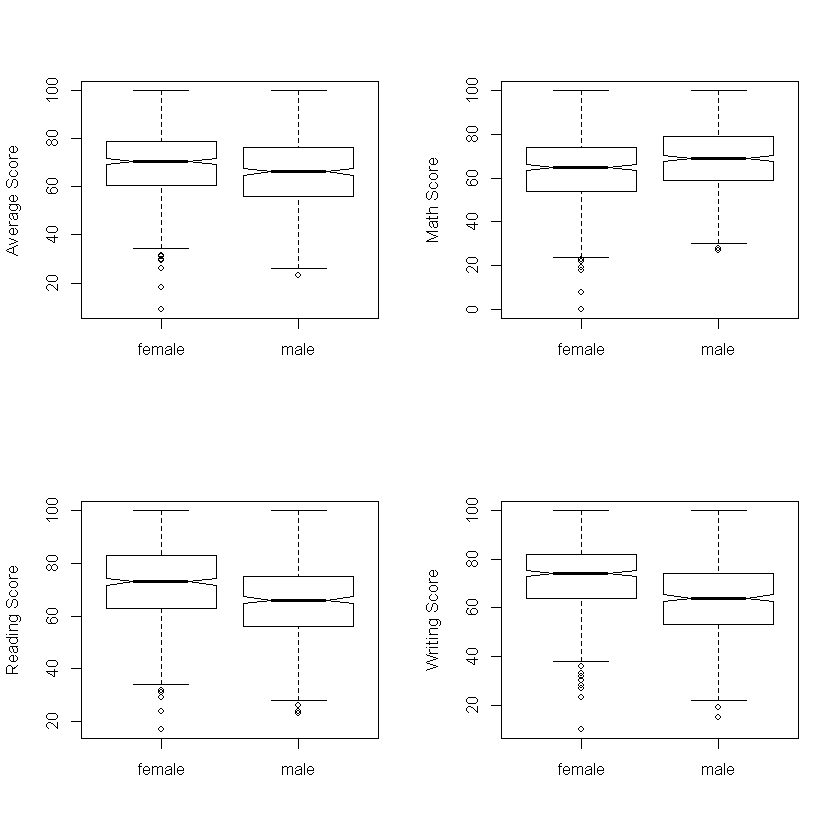

In [239]:
# Create Plot: gender vs. scores

#students$avg = (students$math + students$reading + students$writing) / 3
par(mfrow = c(2,2))
boxplot(students$avg_score ~ students$gender, ylab = "Average Score", notch = TRUE)
boxplot(students$math ~ students$gender, ylab = "Math Score", notch = TRUE)
boxplot(students$reading ~ students$gender, ylab = "Reading Score", notch = TRUE)
boxplot(students$writing ~ students$gender, ylab = "Writing Score", notch = TRUE)

             Df Sum Sq Mean Sq F value   Pr(>F)    
gender        1   6481    6481   28.98 9.12e-08 ***
Residuals   998 223208     224                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
gender        1  12711   12711   63.35 4.68e-15 ***
Residuals   998 200242     201                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

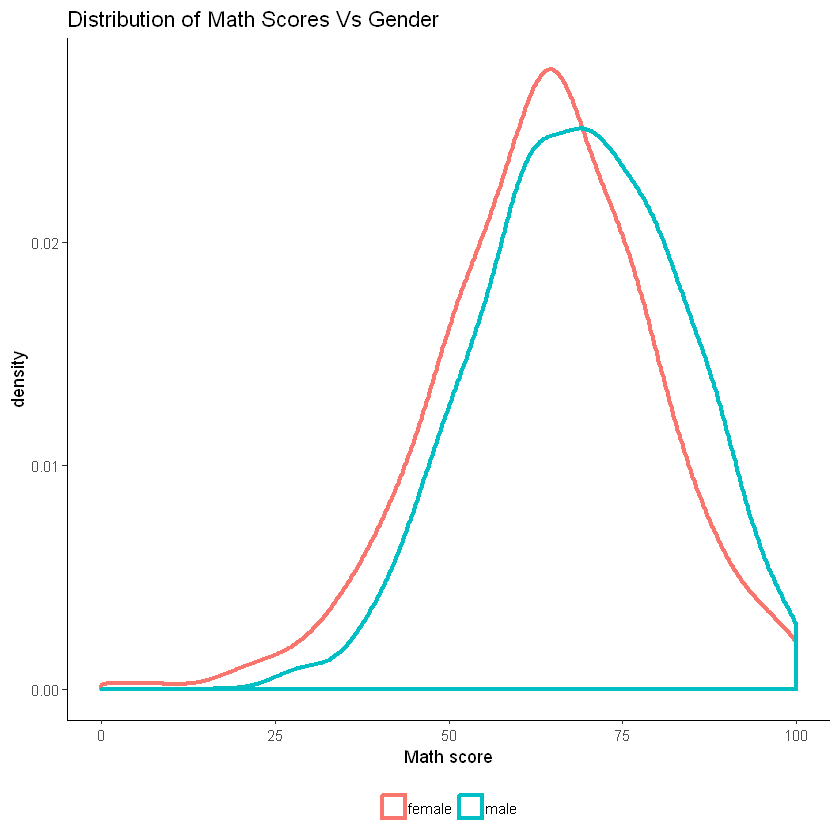

             Df Sum Sq Mean Sq F value Pr(>F)    
gender        1  20931   20931   99.59 <2e-16 ***
Residuals   998 209746     210                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

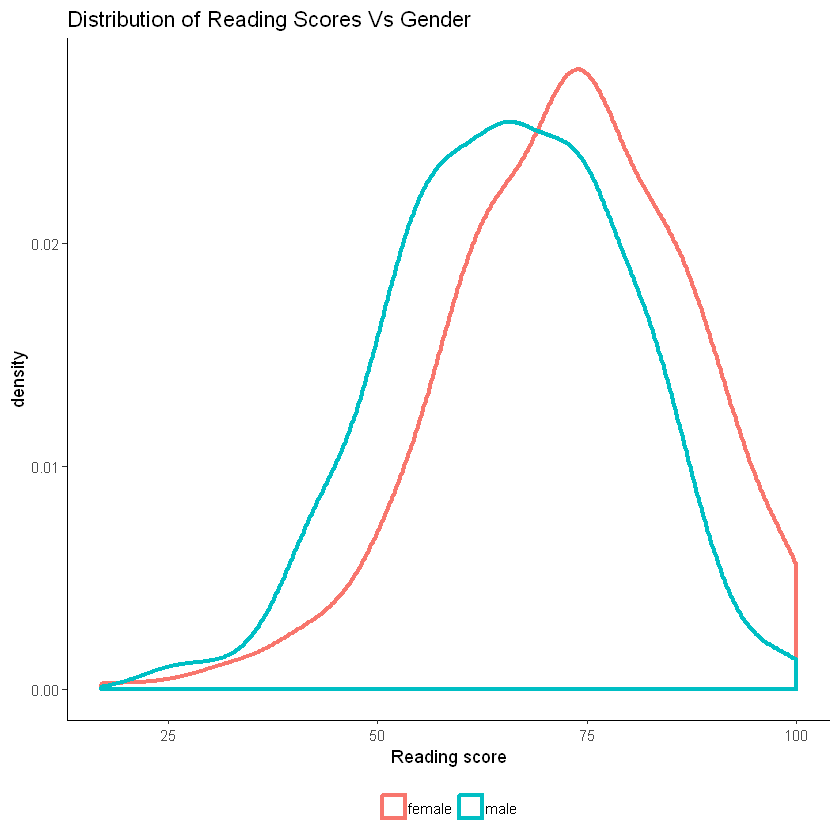

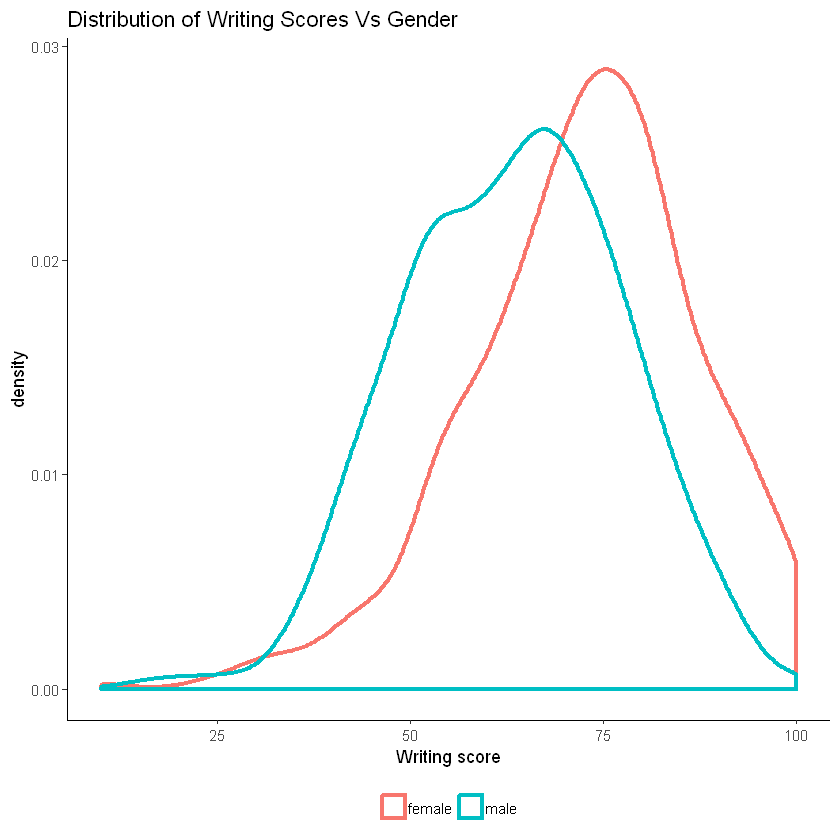

In [240]:
## Distribution of Math, Reading and Writing scores and Gender

aov(math~gender,data=students) %>% summary()
ggplot(students,aes(math,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Math score",title="Distribution of Math Scores Vs Gender")

## Reading scores and Gender
aov(reading~gender,data=students) %>% summary()
ggplot(students,aes(reading,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Reading score",title="Distribution of Reading Scores Vs Gender")

aov(writing~gender,data=students) %>% summary()
ggplot(students,aes(writing,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Writing score",title="Distribution of Writing Scores Vs Gender")

# Lunch Status analysis

Analysis of Lunch Status to various other data attributes was completed.

Results:  Lunch status was considered to be a substitute of parent income level since families have to be below a certain level to qualify for free/reduced lunch.

Across the board, it would appear students that participate in standard lunch (higher income) do better.


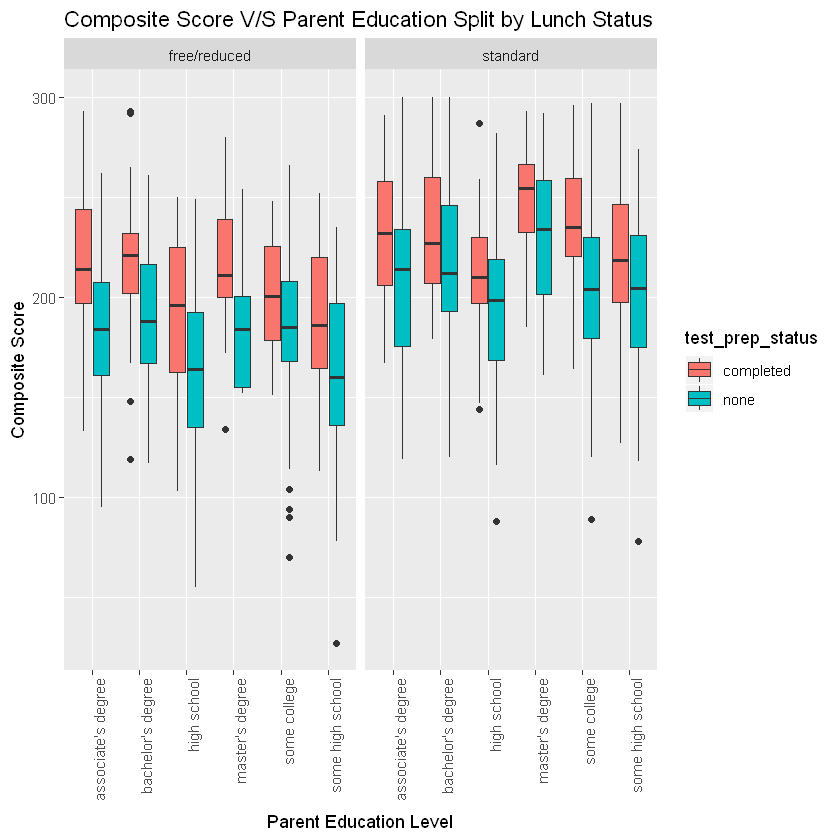

In [241]:
# Plotting composite score across Math, reading and writing to Lunch status and test prep status and parental education.

ggplot(data=students, aes(y=composite.score, x= parent_education, fill= test_prep_status))+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    ggtitle("Composite Score V/S Parent Education Split by Lunch Status")+xlab("Parent Education Level")+ylab("Composite Score")+facet_grid(~lunch)

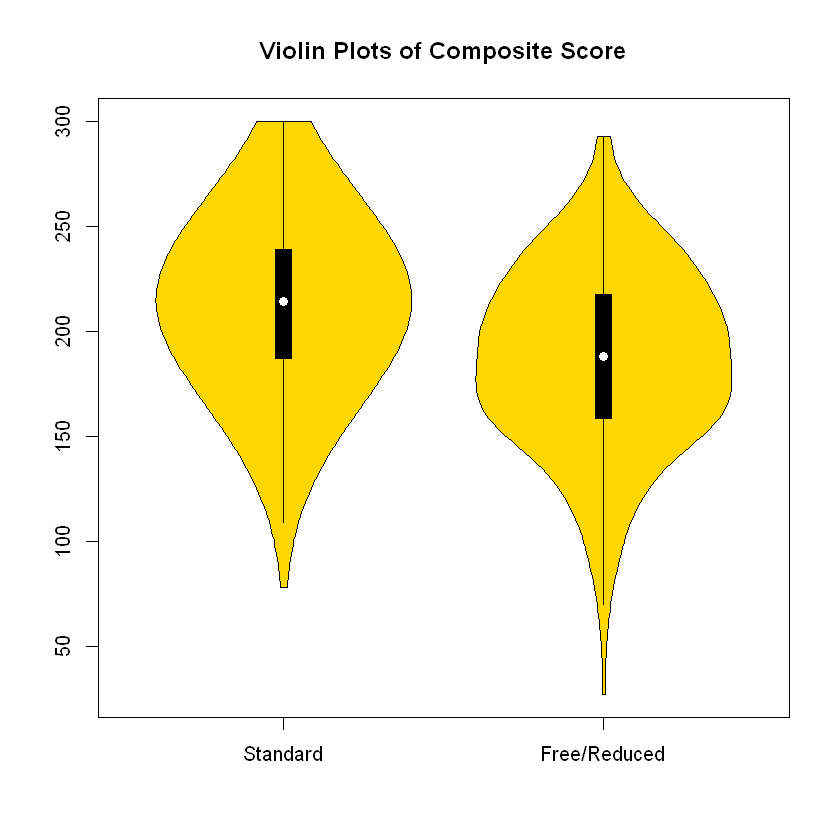

In [242]:
# Violin Plots for lunch status and composite score

library(vioplot)
x1 <- students$composite.score[students$lunch_code==1]
x2 <- students$composite.score[students$lunch_code==2]

vioplot(x1, x2, names=c("Standard", "Free/Reduced"), 
   col="gold")
title("Violin Plots of Composite Score")

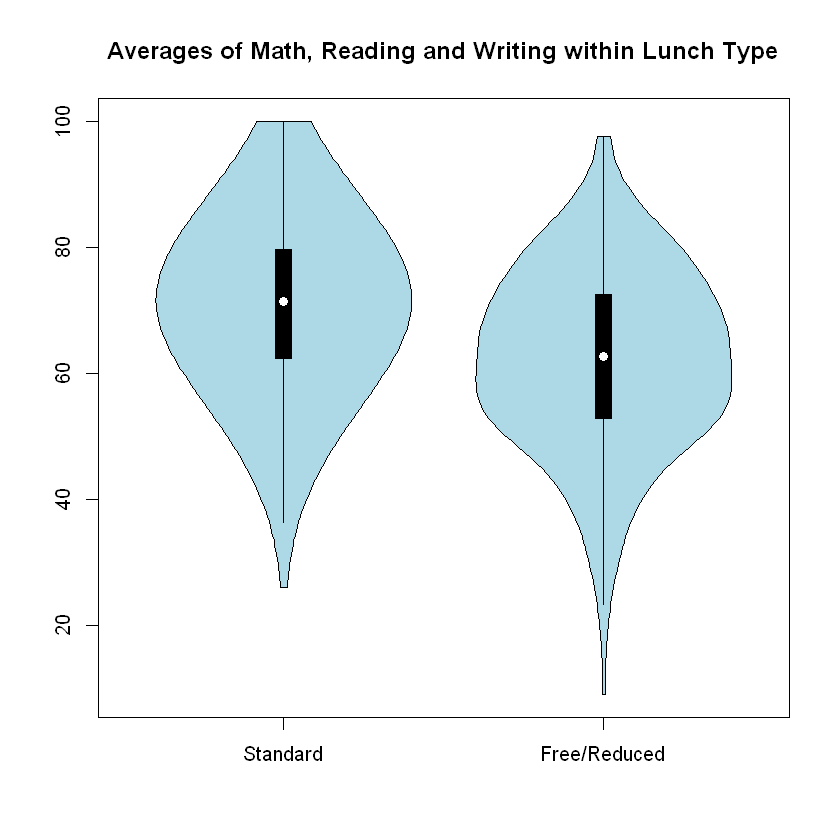

In [243]:
# Violin Plots - average scores across reading/writing/math for each student

library(vioplot)
x1 <- students$avg_score[students$lunch_code==1]
x2 <- students$avg_score[students$lunch_code==2]

vioplot(x1, x2, names=c("Standard", "Free/Reduced"), 
   col="lightblue")
title("Averages of Math, Reading and Writing within Lunch Type")

# Analysis of various data points

    Group E ethnicity grouping has higher composite scores than other groups.  Group E also appears to have higher 
    level of Parental Education
    NOTE:  Additional data that identifies the ethnicity really would be required to do any deeper analysis into ethnicity
    correlation.
    

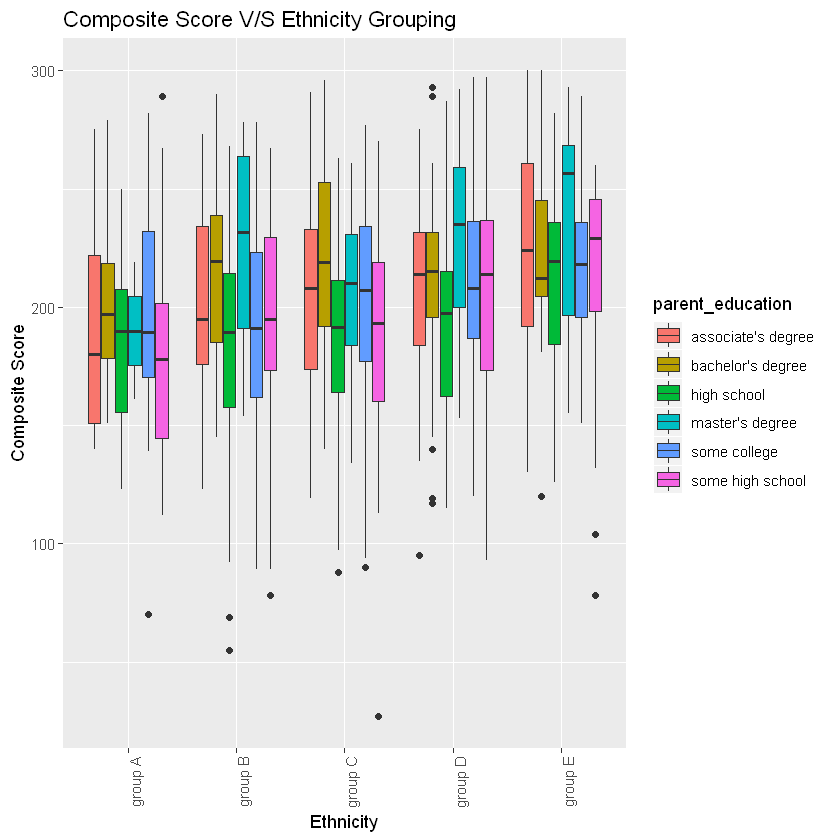

In [244]:
# Plotting composite score against ethnicity group and parent education level

ggplot(data=students, aes(y=composite.score, x= ethnicity, fill= parent_education))+
    geom_boxplot()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    ggtitle("Composite Score V/S Ethnicity Grouping")+xlab("Ethnicity")+ylab("Composite Score")

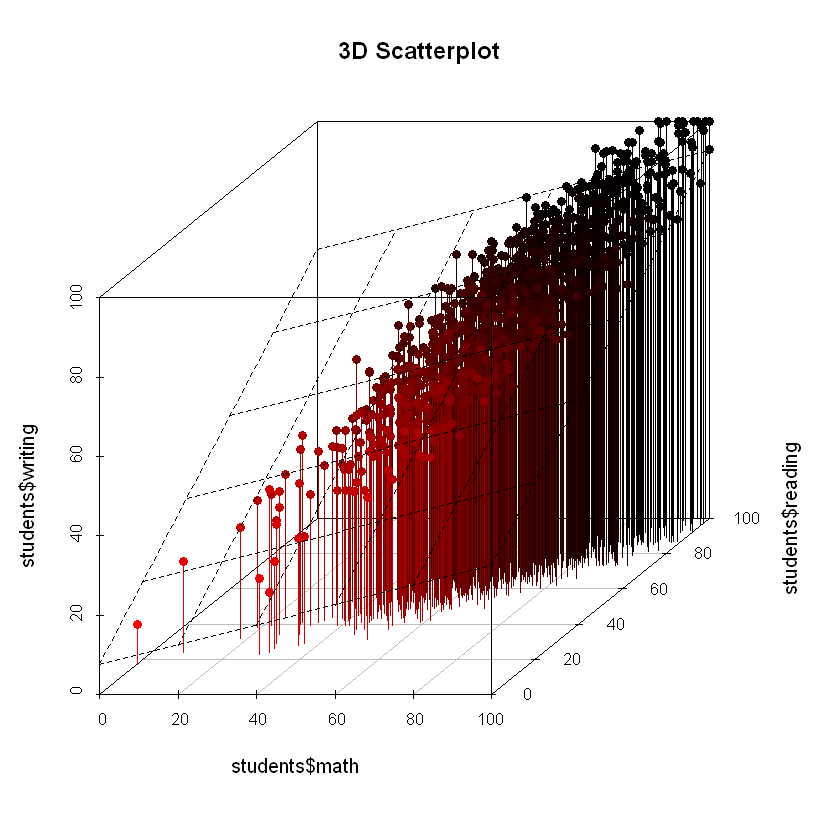

In [261]:
# 3D Scatterplot with Coloring and Vertical Lines
# and Regression Plane 
library(scatterplot3d) 

s3d <-scatterplot3d(students$math,students$reading,students$writing, pch=16, highlight.3d=TRUE,
  type="h", main="3D Scatterplot")
fit <- lm(students$math ~ students$writing+students$reading) 
s3d$plane3d(fit)

# Subject Score frequencies by cuts


In [246]:
math_scores = students$math
range(math_scores)
breaks = seq(0, 100, by=25)
math_scores.cut = cut(math_scores, breaks)
math_scores.freq = table(math_scores.cut)
cbind(math_scores.freq)
math_scores.freq

reading_scores = students$reading
range(reading_scores)
breaks = seq(0, 100, by=25)
reading_scores.cut = cut(reading_scores, breaks)
reading_scores.freq = table(reading_scores.cut)
cbind(reading_scores.freq)
reading_scores.freq

writing_scores = students$writing
range(writing_scores)
breaks = seq(0, 100, by=25)
writing_scores.cut = cut(writing_scores, breaks)
writing_scores.freq = table(writing_scores.cut)
cbind(writing_scores.freq)
writing_scores.freq

[1]   0 100

,math_scores.freq
"(0,25]",6
"(25,50]",143
"(50,75]",576
"(75,100]",274


math_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       6      143      576      274 

[1]  17 100

,reading_scores.freq
"(0,25]",4
"(25,50]",93
"(50,75]",559
"(75,100]",344


reading_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       4       93      559      344 

[1]  10 100

,writing_scores.freq
"(0,25]",5
"(25,50]",119
"(50,75]",548
"(75,100]",328


writing_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       5      119      548      328 

# Stem-And-Leaf Plots

    Stem and Leaf plots reflect the score occurrences.  A stem-and-leaf plot of a quantitative variable is a textual graph 
    that classifies data items according to their most significant numeric digits

    A stem-and-leaf plot of the score variable identifies scores with the same two most significant digits, and queue 
    them up in rows.

    Left value is the first digit of the score, which is the stem.  The right values are the 2nd digit of the score and 
    the range that leafs out.
    
### Additional context for Stem and Leaf plots can be found here - 
    https://www.statisticshowto.datasciencecentral.com/stemplot/
    
#### What is a Stem plot?
    
    A stemplot is like a histogram — they are both tools to help you visualize a data set. Stemplots show a little more 
    information than a histogram and have been a common tool for displaying data sets since the 1970s. They are typically 
    used when there is a medium amount of quantitative variables to analyze; Stemplots of more than 50 observations are 
    unusual. The name “Stem plot” comes because there is one “stem” with the largest place-value digits to the left (shaded 
    in gray in the image below) and one “leaf” to the right.
				
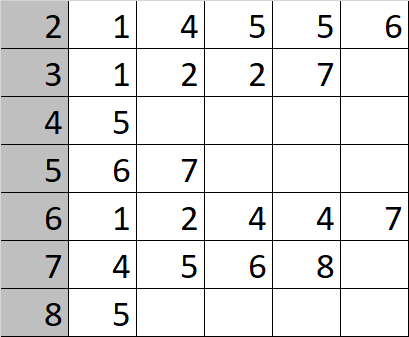

    The first few values from this stem plot are:

    21 24 25 25 26 (the first line).
    31 32 32 37 (the second line)
    
#### What are Stemplots used For?
    
    A stem and leaf plot is a way to plot data where the data is split into stems (the largest digit) and leaves (the 
    smallest digits). They were widely used before the advent of the personal computer, as they were a fast way to 
    sketch data distributions by hand. They are used less frequently today, but you’ll still see some here and there.

    The stem and leaf plot is used like a histogram; it allows you to compare data. While a histogram uses bars to 
    represent amounts, the leaves of the stemplot represent amounts. A very long leaf means that “stem” has a large 
    amount of data. The stems with the largest amount of data in the picture above are the 2 and 6 stems.
    
#### Advantages
    
    Stem and leaf plots are useful in some cases because you can see where the bulk of scores lie. In the above graph, 
    most scores were in the 20s or 60s. Bar graphs also show this information, but the advantage the stem and leaf plot 
    have is that you can see all of the scores (other charts usually show just totals). These types of charts give you a 
    quick overview of a distribution and you can also see the shape of the distribution (think of each leaf as representing 
    a bar on a bar chart). They are also useful for highlighting the mode (the most common number in a data set) and for 
    finding outliers.

#### Disadvantages
    
    A disadvantage of stem and leaf plots is they are really only useful for small data sets from about 15 to 150 data 
    points. Dot plots are usually more useful for smaller data sets, and for larger data sets a box plot or histogram is 
    used.
    
    

In [247]:
# Math score STEM
stem(math_scores, scale=2)



  The decimal point is 1 digit(s) to the right of the |

   0 | 0
   0 | 8
   1 | 
   1 | 89
   2 | 234
   2 | 6778999
   3 | 00222344
   3 | 555556677778889999
   4 | 000000000011111122222233333444444444
   4 | 55555555566666666666777777777778888888888899999999999999999
   5 | 00000000000000011111111111222222222222222222333333333333333333333333+6
   5 | 55555555555555555566666666677777777777777777788888888888888888888888+22
   6 | 00000000000000001111111111111111111111111112222222222222222222222222+44
   6 | 55555555555555555555555555555555555566666666666666666666666677777777+64
   7 | 00000000000000000011111111111111111111111111222222222222222222333333+34
   7 | 55555555555555555555566666666666666666666677777777777777777777777788+22
   8 | 00000000000000000111111111111111111111122222222222222222233333333444
   8 | 55555555555555666666667777777777777777888888888888888999999
   9 | 0000000011111111122222233334444444
   9 | 55666777777888999
  10 | 0000000



In [248]:
stem(students$reading)


  The decimal point is 1 digit(s) to the right of the |

   1 | 7
   2 | 344
   2 | 6899
   3 | 1124444
   3 | 77788999999
   4 | 011111122222223333333334444
   4 | 5555555666666777788888888889999999999
   5 | 00000001111111111111111222222222222222233333333333334444444444444444
   5 | 55555555555555556666666666666666777777777777777778888888888888888888+14
   6 | 00000000000000000000011111111111111111111111122222222222222222222223+39
   6 | 55555555555555555556666666666666666666666666667777777777777777777777+34
   7 | 00000000000000000000000000111111111111111111112222222222222222222222+63
   7 | 55555555555555555555555555666666666666666666666666677777777777777777+41
   8 | 00000000000000111111111111111111111111122222222222222222222333333333+19
   8 | 55555555555555555566666666666666666667777777777777888888888999999999
   9 | 000000000000000001111112222222222333333444
   9 | 55555555666677777999
  10 | 00000000000000000



In [249]:
stem(students$writing)


  The decimal point is 1 digit(s) to the right of the |

   1 | 0
   1 | 59
   2 | 23
   2 | 7778
   3 | 02233444
   3 | 566667788888899
   4 | 00011111111222222233333333333344444444
   4 | 55555556666666666777777777788888888999999999
   5 | 00000000001111111111111111122222222222222222222333333333333333334444+9
   5 | 55555555555555666666666666667777777777777777777888888888888888888999
   6 | 00000000000000000000111111111111111111111222222222222222222222222222+25
   6 | 55555555555555555555556666666666666666666666667777777777777777777777+45
   7 | 00000000000000000000000000000000011111111111111111122222222222222222+59
   7 | 55555555555555555555556666666666666666666666666777777777777777777777+35
   8 | 00000000000000000000000000011111111111111111111222222222222222222222+20
   8 | 555555555555556666666666667777777777788888888888999999999
   9 | 00000000001111111111122222222233333333444444
   9 | 55555555666677889999
  10 | 00000000000000



# Linear Regression discussion - R Studio

## Linear Regression Summary: Math Score Model
     
### What is Linear Regression?

Linear regression is used to predict the value of an outcome variable Y based on one or more input predictor variables X. The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable, so that, we can use this formula to estimate the value of the response Y, when only the predictors (Xs) values are known.
The aim of linear regression is to model a continuous variable Y as a mathematical function of one or more X variable(s), so that we can use this regression model to predict the Y when only the X is known.
Confidence and prediction intervals are often formed to answer questions such as the above. Intervals allow one to estimate a range of values that can be said with reasonable confidence (typically 95%)
contains the true population parameter. It should be noted that although the questions above sound similar, there is a difference in estimating a mean response and predicting a new value. This difference will be seen in the interval equations. This post will explore confidence and prediction intervals as well as the confidence ‘bands’ around a linear regression line.

http://r-statistics.co/Linear-Regression.html

Reference for writing R code for Linear Regression:  https://rstudio-pubs-static.s3.amazonaws.com/71339_d0b8346f41314979bc394448c5d60d86.html
    
#### Results

    Adjusted R Squared for math scores = 0.8704 -> 86.9% of variation by independent variables in the model.

     R Squared value indicates good prediction model.

     F-Statistics signifies P-value of near zero.

     Visualization at 95% confidence and prediction intervals.

    Equation:  math = (writing*coefficient) + (reading*coefficient) + (gender_code*coefficient) + (ethnic_code*coefficient)
        + (lunch_code*coefficient) + (education_code*coefficient) + (test_code*coefficient)
        
    Coefficients:
       (Intercept)  14.9324
       writing      0.6911
       reading   0.2739
       gender_code_f  -13.2443
       ethnic_code  0.7932
       lunch_code  -2.9983
       education_code  -0.1361     
       test_code  -3.4631
 
    The intercept value indicates that a student would receive the low score of 14.9324 (or actual results) for math if 
    variables for student were set to lowest values.

    NOTE:  Prior to using the equation, we would have to further normalize the reading and writing scores to be more 
    aligned with the categorical scores.  https://www.rdocumentation.org/packages/BBmisc/versions/1.10/topics/normalize
    
    P Values show that the variables of gender, ethnicity, parent education level, test prep status and lunch status 
    all have significance for model prediction.
    
        Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
    (Intercept)     15.08070    1.74016   8.666  < 2e-16 ***
    writing          0.58267    0.05438  10.715  < 2e-16 ***
    reading          0.39810    0.05260   7.568 1.28e-13 ***
    gender_code_f  -13.05590    0.46481 -28.088  < 2e-16 ***
    ethnic_code      0.76601    0.18387   4.166 3.51e-05 ***
    lunch_code      -3.12746    0.47288  -6.614 7.76e-11 ***
    education_code  -0.26410    0.09159  -2.883  0.00406 ** 
    test_code       -3.03895    0.49677  -6.117 1.63e-09 ***
    
    Because the Adjusted R Squared is so significant, we would use Linear Regression and not do Random Forest - simplest 
    model should be leveraged.



In [250]:
# Replaced categorical data columns with numerical references
# Next step to improve predictability would be to normalize the writing and reading scores.

students <- students %>% 
       mutate(gender_code_f = case_when(gender == "female" ~ 1, 
                                     TRUE ~ 0))

students <- students %>% 
       mutate(ethnic_code = case_when(ethnicity == "group A" ~ 1, 
                                    ethnicity == "group B" ~ 2,
                                    ethnicity == "group C" ~ 3,
                                    ethnicity == "group D" ~ 4,
                                    ethnicity == "group E" ~ 5,
                                    TRUE ~ 0))
students <- students %>% 
       mutate(education_code = case_when(parent_education == "some high school" ~ 9,
                                    parent_education == "high school" ~ 12,
                                    parent_education == "some college" ~ 13,
                                    parent_education == "associate's degree" ~ 14,
                                    parent_education == "bachelor's degree" ~ 16,
                                    parent_education == "master's degree" ~ 18,
                                    TRUE ~ 0))
students <- students %>% 
       mutate(test_code = case_when(test_prep_status == "none" ~ 1, 
                                    test_prep_status == "completed" ~ 2,
                                     TRUE ~ 0))
              
head(students)

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code,composite.score,avg_score,gender_code_f,ethnic_code,education_code,test_code
female,group B,bachelor's degree,standard,none,72,72,74,1,218,72.66667,1,2,16,1
female,group C,some college,standard,completed,69,90,88,1,247,82.33333,1,3,13,2
female,group B,master's degree,standard,none,90,95,93,1,278,92.66667,1,2,18,1
male,group A,associate's degree,free/reduced,none,47,57,44,2,148,49.33333,0,1,14,1
male,group C,some college,standard,none,76,78,75,1,229,76.33333,0,3,13,1
female,group B,associate's degree,standard,none,71,83,78,1,232,77.33333,1,2,14,1



Call:
lm(formula = math ~ writing + reading + gender_code_f + ethnic_code + 
    lunch_code + education_code + test_code, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.497  -3.558   0.172   3.725  15.149 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     14.93236    1.77744   8.401 2.73e-16 ***
writing          0.69108    0.05355  12.905  < 2e-16 ***
reading          0.27389    0.05214   5.253 2.02e-07 ***
gender_code_f  -13.24431    0.47348 -27.972  < 2e-16 ***
ethnic_code      0.79322    0.19555   4.056 5.58e-05 ***
lunch_code      -2.99833    0.47673  -6.289 5.81e-10 ***
education_code  -0.13614    0.09314  -1.462    0.144    
test_code       -3.46308    0.49738  -6.963 8.10e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.59 on 658 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.8615 
F-statistic: 592.2 on 7 and 658 DF,  p-value: < 2.2e-

      fit              lwr             upr        
 Min.   : 23.93   Min.   :12.83   Min.   : 35.03  
 1st Qu.: 55.34   1st Qu.:44.30   1st Qu.: 66.37  
 Median : 65.58   Median :54.57   Median : 76.59  
 Mean   : 65.35   Mean   :54.31   Mean   : 76.39  
 3rd Qu.: 75.29   3rd Qu.:64.24   3rd Qu.: 86.35  
 Max.   :103.29   Max.   :92.23   Max.   :114.36  

,fit,lwr,upr
1,88.94395,77.85778,100.03013
2,82.39845,71.32136,93.47554
3,82.27955,71.22341,93.33569
4,80.44375,69.40307,91.48443
5,90.34152,79.28972,101.39333
6,43.16810,32.11510,54.22111


gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code,composite.score,avg_score,gender_code_f,ethnic_code,education_code,test_code,fit,lwr,upr
male,group E,some high school,standard,none,92,87,78,1,257,85.66667,0,5,9,1,88.94395,77.85778,100.03013
male,group D,associate's degree,free/reduced,none,90,87,75,2,252,84.00000,0,4,14,1,82.39845,71.32136,93.47554
male,group B,some high school,standard,completed,85,84,78,1,247,82.33333,0,2,9,2,82.27955,71.22341,93.33569
male,group D,some high school,standard,none,74,74,72,1,220,73.33333,0,4,9,1,80.44375,69.40307,91.48443
male,group E,associate's degree,standard,completed,97,82,88,1,267,89.00000,0,5,14,2,90.34152,79.28972,101.39333
female,group B,high school,free/reduced,none,38,60,50,2,148,49.33333,1,2,12,1,43.16810,32.11510,54.22111


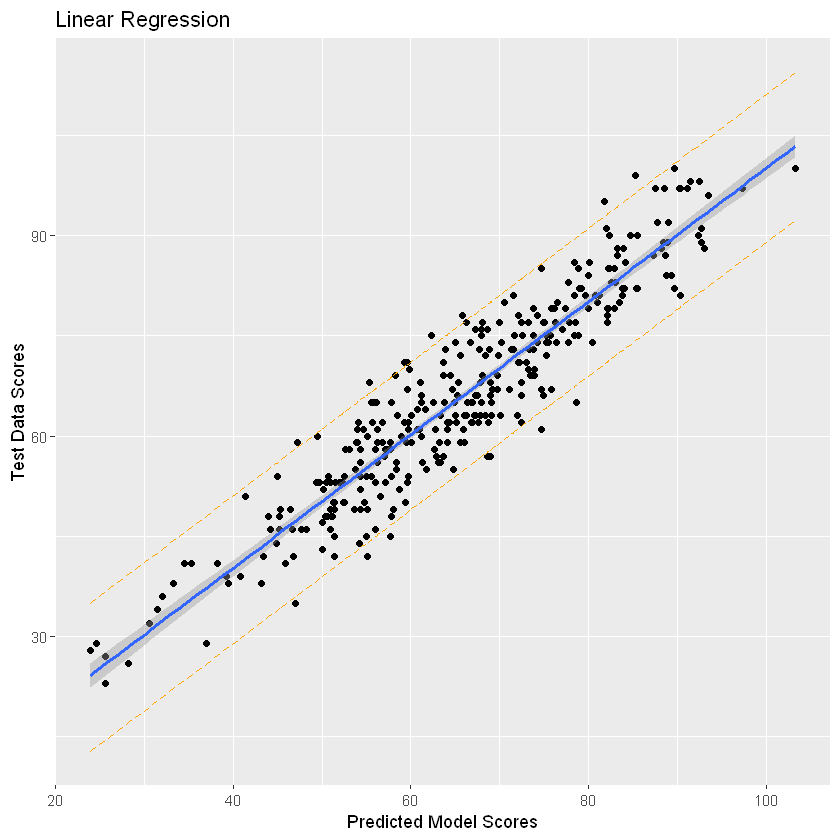

In [251]:
## Linear Regression

### Split data, into 2/3 & 1/3
randIndex <- sample(1:dim(students)[1])

cutpoint2_3 <- floor(2*dim(students)[1]/3)

# create training data set with first 2/3 of students data & test data with remaining 1/3 data
trainingData <- students[randIndex[1:cutpoint2_3],]

testData <- students[randIndex[(cutpoint2_3+1):dim(students)[1]],]

#95% Prediction confidence interval lm model
model <- lm(math ~ writing + reading + gender_code_f + ethnic_code + lunch_code + education_code + test_code,data=trainingData)
summary(model)
lmPred <- predict(model,testData,interval = "prediction", level=0.95)
summary(lmPred)
head(lmPred)

#Adding predictions to test data
data1 <- cbind(testData, lmPred)
head(data1)
#Adding Regression line + confidence intervals
f <- ggplot(data1, aes( fit, math)) +
 geom_point() +
 stat_smooth(method = lm)
## 0 = blank, 1 = solid, 2 = dashed, 3 = dotted, 4 = dotdash, 5 = longdash, 6 = twodash
#create lines
f + geom_line(aes(y = lwr), color = "orange", linetype = "longdash")+
 geom_line(aes(y = upr), color = "orange", linetype = "longdash") +
ggtitle("Linear Regression")+
xlab("Predicted Model Scores") + ylab("Test Data Scores")


In [252]:
# Linear Regression model output
model


Call:
lm(formula = math ~ writing + reading + gender_code_f + ethnic_code + 
    lunch_code + education_code + test_code, data = trainingData)

Coefficients:
   (Intercept)         writing         reading   gender_code_f     ethnic_code  
       14.9324          0.6911          0.2739        -13.2443          0.7932  
    lunch_code  education_code       test_code  
       -2.9983         -0.1361         -3.4631  


# Random Forest

#### Reference cite - https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

#### https://trevorstephens.com/kaggle-titanic-tutorial/r-part-5-random-forests/

#### https://www.kaggle.com/predact/easy-r-titanic-predictive-model

#### https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

(Random Forest Titanic project in Kaggle in Python - https://www.kaggle.com/niklasdonges/end-to-end-project-with-python)

We worked on Random Forest as 2nd step and to see if we could leverage, however, Linear Regression shows appropriate results.

In [253]:
students$gender <- as.factor(students$gender)
math.equation <- "math ~  ethnic_code + lunch_code + education_code + test_code + gender"
math.formula <- as.formula(math.equation)

student.model <- randomForest(formula=math.formula,
             data=students,
             ntree = 750,
             mtry = 2,
             nodesize = 0.01*nrow(students),
             importance = TRUE,
             do.trace=100
             )

math <- predict(student.model,newdata=validation1)



     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 100 |    184.3    80.26 |
 200 |    185.2    80.65 |
 300 |      185    80.55 |
 400 |    184.8    80.44 |
 500 |    184.6    80.37 |
 600 |    184.6    80.35 |
 700 |    184.5    80.33 |



Call:
 randomForest(formula = math.formula, data = students, ntree = 750,      mtry = 2, nodesize = 0.01 * nrow(students), importance = TRUE,      do.trace = 100) 
               Type of random forest: regression
                     Number of trees: 750
No. of variables tried at each split: 2

          Mean of squared residuals: 184.5352
                    % Var explained: 19.66

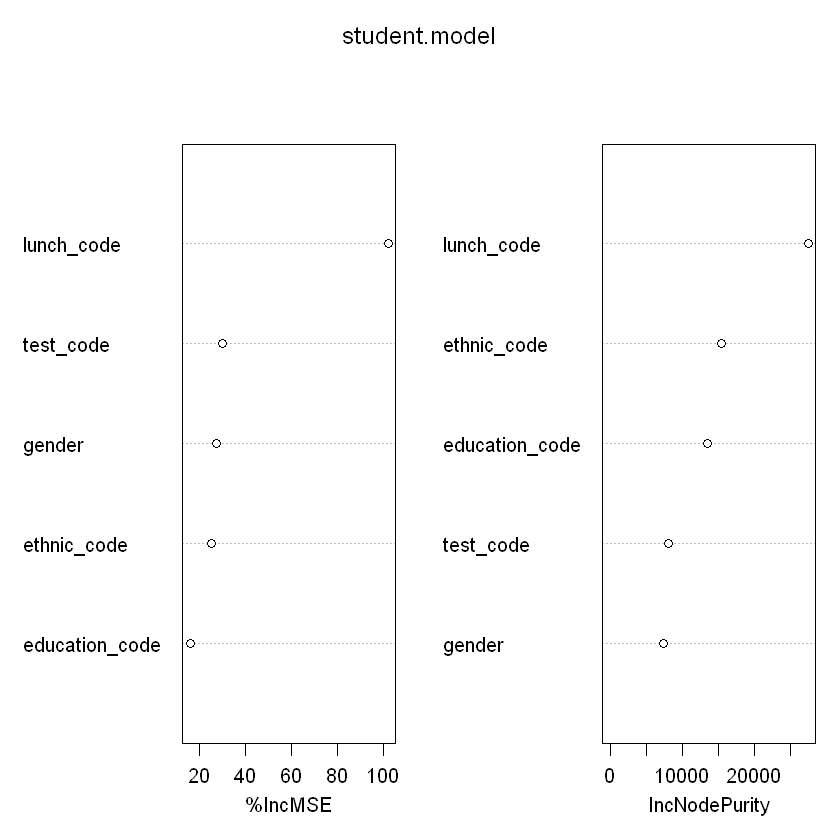

In [254]:
student.model
varImpPlot(student.model)

#### VarImpPlot information

Each features’s importance is assessed based on two criteria:

%IncMSE is the most robust and informative measure. It is the increase in mse of predictions(estimated with out-of-bag-CV) as a result of variable j being permuted(values randomly shuffled).  The higher number, the more important

IncNodePurity relates to the loss function which by best splits are chosen. The loss function is mse for regression and gini-impurity for classification. More useful variables achieve higher increases in node purities, that is to find a split which has a high inter node 'variance' and a small intra node 'variance'. IncNodePurity is biased and should only be used if the extra computation time of calculating %IncMSE is unacceptable. Since it only takes ~5-25% extra time to calculate %IncMSE, this would almost never happen.

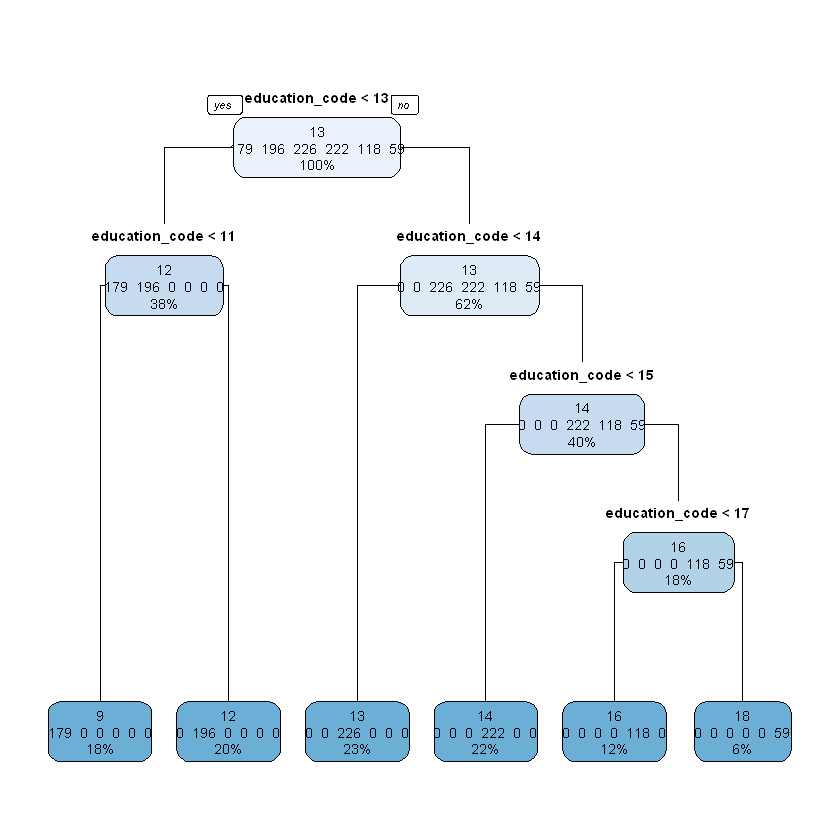

In [262]:
library("rpart")

library("rpart.plot")

education <- rpart(as.factor(education_code) ~ gender_code_f + ethnic_code + test_code + education_code + lunch_code,
                 data=students)

rpart.plot(education, type=1, extra=101, box.palette="Blues")

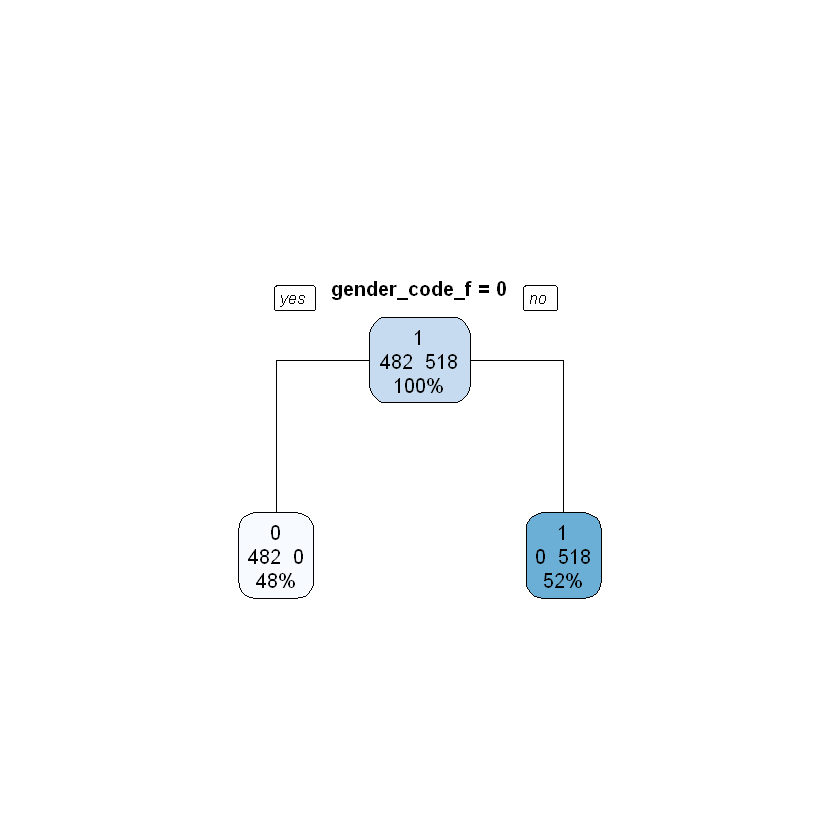

In [263]:
gender <- rpart(as.factor(gender_code_f) ~ gender_code_f + ethnic_code + test_code + education_code + lunch_code,
                 data=students)

rpart.plot(gender, type=1, extra=101, box.palette="Blues")

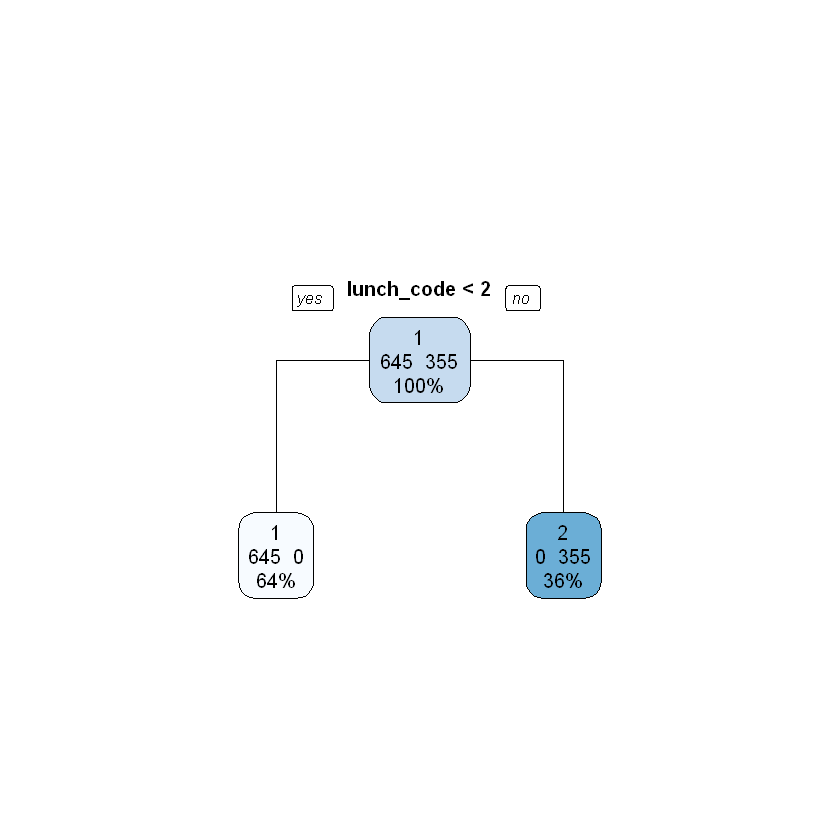

In [265]:
lunch <- rpart(as.factor(lunch_code) ~ gender_code_f + ethnic_code + test_code + education_code + lunch_code,
                 data=students)

rpart.plot(lunch, type=1, extra=101, box.palette="Blues")

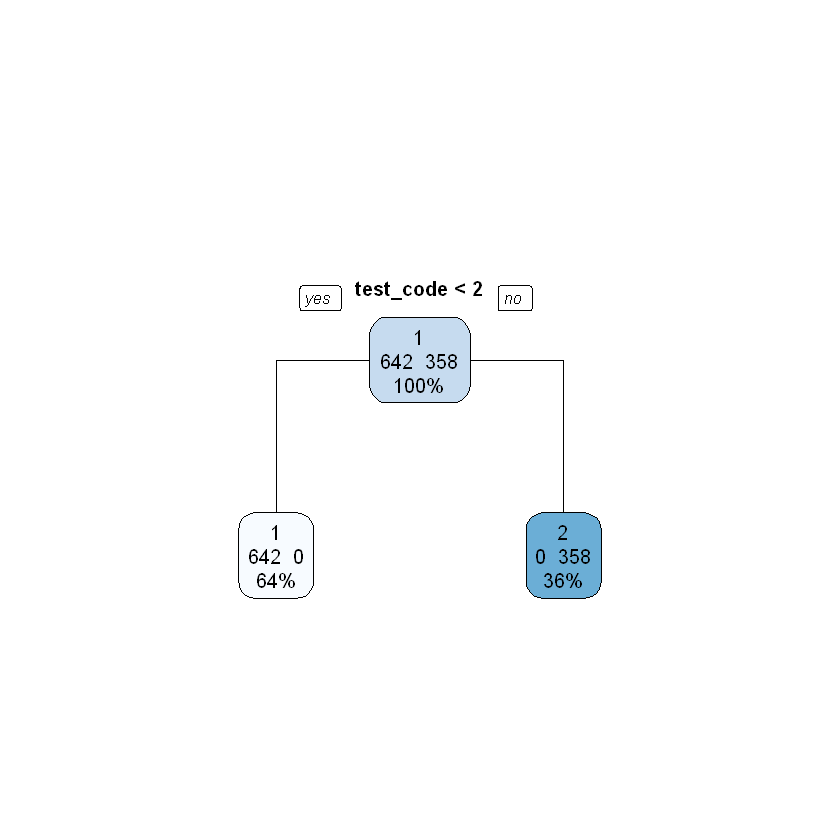

In [266]:
prep <- rpart(as.factor(test_code) ~ gender_code_f + ethnic_code + test_code + education_code + lunch_code,
                 data=students)

rpart.plot(prep, type=1, extra=101, box.palette="Blues")
